In [0]:
import urllib.request
urllib.request.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "/tmp/kddcup_data.gz")
dbutils.fs.mv("file:/tmp/kddcup_data.gz", "dbfs:/kdd/kddcup_data.gz")
display(dbutils.fs.ls("dbfs:/kdd"))

path,name,size,modificationTime
dbfs:/kdd/kddcup_data.gz,kddcup_data.gz,2144903,1730132101000


In [0]:
#Load the data into Spark's RDD
kdd_rdd = sc.textFile("dbfs:/kdd/kddcup_data.gz")

#Print 10 values of the RDD
for i in kdd_rdd.take(10):
    print(i)

#Verify the type of data structure of the data
print(type(kdd_rdd))

0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,69,1.00,0.00,1.00,0

In [0]:
#Split the data
kdd_rdd_split = kdd_rdd.map(lambda x: x.split(","))

#Show the total number of features, namely columns
print(len(kdd_rdd_split.first()))

for i in kdd_rdd_split.take(10):
    print(i)

42
['0', 'tcp', 'http', 'SF', '181', '5450', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '9', '9', '1.00', '0.00', '0.11', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.']
['0', 'tcp', 'http', 'SF', '239', '486', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '19', '19', '1.00', '0.00', '0.05', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.']
['0', 'tcp', 'http', 'SF', '235', '1337', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '29', '29', '1.00', '0.00', '0.03', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.']
['0', 'tcp', 'http', 'SF', '219', '1337', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '6', '6', '0.00', '0.00', '0.00', '0.00', '1.00', '0.

In [0]:
from pyspark.sql import Row

#Extract the 6 columns
kdd_rdd_extract = kdd_rdd_split.map(lambda x: Row(
    duration=int(x[0]),
    protocol_type=x[1],
    service=x[2],
    src_bytes=int(x[4]),
    dst_bytes=int(x[5]),
    flag=x[6],
    label=x[-1]
))

#Build a new RDD and data frame
kdd_df = kdd_rdd_extract.toDF()

kdd_df.printSchema()

kdd_df.show(10)

root
 |-- duration: long (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- src_bytes: long (nullable = true)
 |-- dst_bytes: long (nullable = true)
 |-- flag: string (nullable = true)
 |-- label: string (nullable = true)

+--------+-------------+-------+---------+---------+----+-------+
|duration|protocol_type|service|src_bytes|dst_bytes|flag|  label|
+--------+-------------+-------+---------+---------+----+-------+
|       0|          tcp|   http|      181|     5450|   0|normal.|
|       0|          tcp|   http|      239|      486|   0|normal.|
|       0|          tcp|   http|      235|     1337|   0|normal.|
|       0|          tcp|   http|      219|     1337|   0|normal.|
|       0|          tcp|   http|      217|     2032|   0|normal.|
|       0|          tcp|   http|      217|     2032|   0|normal.|
|       0|          tcp|   http|      212|     1940|   0|normal.|
|       0|          tcp|   http|      159|     4087|   0|norm

+-------------+------+
|protocol_type| count|
+-------------+------+
|          udp| 20354|
|          tcp|190065|
|         icmp|283602|
+-------------+------+



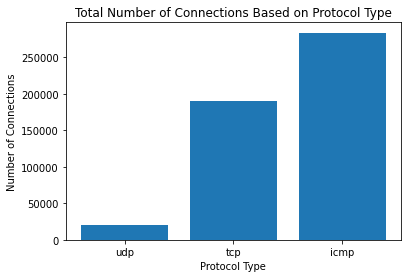

+-----------+-----+
|    service|count|
+-----------+-----+
|     tftp_u|    1|
|    pm_dump|    1|
|      red_i|    1|
|      tim_i|    7|
|        X11|   11|
|      urh_i|   14|
|        IRC|   43|
|     Z39_50|   92|
|    netstat|   95|
|        ctf|   97|
|       name|   98|
|     kshell|   98|
|       exec|   99|
|netbios_dgm|   99|
|   http_443|   99|
|       ldap|  101|
|      pop_2|  101|
|       link|  102|
| netbios_ns|  102|
|    daytime|  103|
+-----------+-----+
only showing top 20 rows



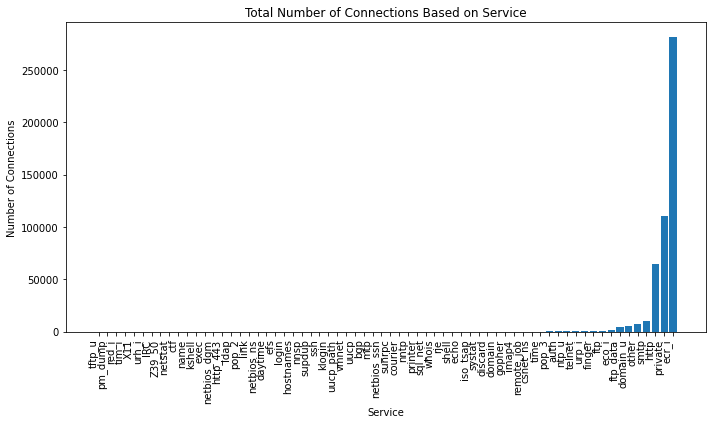

In [0]:
import matplotlib.pyplot as plt

#Get the total number of connections based on the protocol_type
protocol_counts = kdd_df.groupBy("protocol_type").count().orderBy("count")
protocol_counts.show()

protocol_counts_pd = protocol_counts.toPandas()
plt.bar(protocol_counts_pd["protocol_type"], protocol_counts_pd["count"])
plt.xlabel("Protocol Type")
plt.ylabel("Number of Connections")
plt.title("Total Number of Connections Based on Protocol Type")
plt.show()

#Get the total number of connections based on the service
service_counts = kdd_df.groupBy("service").count().orderBy("count")
service_counts.show()

service_counts_pd = service_counts.toPandas()

#Increase figure size
plt.figure(figsize=(10, 6))  

plt.bar(service_counts_pd["service"], service_counts_pd["count"])
plt.xlabel("Service")
plt.ylabel("Number of Connections")
plt.title("Total Number of Connections Based on Service")

#Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90, ha='right')
plt.tight_layout() 
plt.show()

Duration Statistics:
  summary           duration
0   count             494021
1    mean  47.97930249928647
2  stddev  707.7464723053699
3     min                  0
4     max              58329


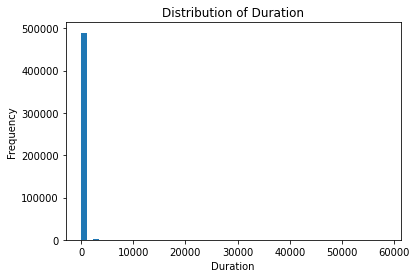

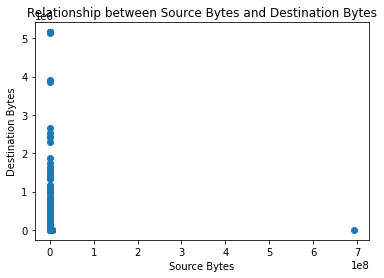

Label Counts:
+----------------+-----+
|           label|count|
+----------------+-----+
|            spy.|    2|
|           perl.|    3|
|            phf.|    4|
|       multihop.|    7|
|      ftp_write.|    8|
|     loadmodule.|    9|
|        rootkit.|   10|
|           imap.|   12|
|    warezmaster.|   20|
|           land.|   21|
|buffer_overflow.|   30|
|   guess_passwd.|   53|
|           nmap.|  231|
|            pod.|  264|
|       teardrop.|  979|
|    warezclient.| 1020|
|      portsweep.| 1040|
|        ipsweep.| 1247|
|          satan.| 1589|
|           back.| 2203|
+----------------+-----+
only showing top 20 rows



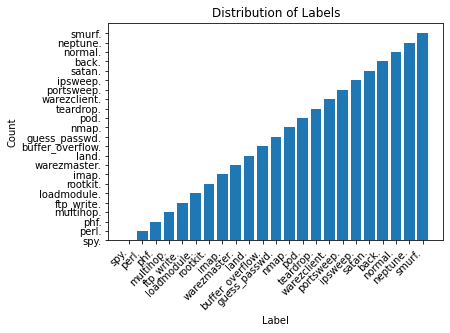

In [0]:
#1. Distribution of Duration

#Duration statistics
duration_stats = kdd_df.describe("duration").toPandas()
print("Duration Statistics:")
print(duration_stats)

#Histogram of the duration
plt.hist(kdd_df.select("duration").toPandas()["duration"], bins=50)
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Distribution of Duration")
plt.show()

#2. Relationship between Source Bytes and Destination Bytes
#Scatter plot of the source bytes and destination bytes
plt.scatter(kdd_df.select("src_bytes").toPandas()["src_bytes"], kdd_df.select("dst_bytes").toPandas()["dst_bytes"])
plt.xlabel("Source Bytes")
plt.ylabel("Destination Bytes")
plt.title("Relationship between Source Bytes and Destination Bytes")
plt.show()

#3. Distribution of Labels
#Label counts
label_counts = kdd_df.groupBy("label").count().orderBy("count")
print("Label Counts:")
label_counts.show()
#Bar chart of the label counts
label_counts_pd = label_counts.toPandas()
plt.bar(label_counts_pd["label"], label_counts_pd["label"])
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels")
plt.xticks(rotation=45, ha='right')
plt.show()

In [0]:
from pyspark.sql.functions import when, col
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#Create a new label column
kdd_df = kdd_df.withColumn("new_label", when(col("label") == "normal.", "normal").otherwise("attack"))

#Index the categorical features
indexer = StringIndexer(inputCols=["protocol_type", "service", "flag", "new_label"], outputCols=["protocol_type_index", "service_index", "flag_index", "new_label_index"])
kdd_df = indexer.fit(kdd_df).transform(kdd_df)

#Assemble the features
assembler = VectorAssembler(inputCols=["duration", "protocol_type_index", "service_index", "src_bytes", "dst_bytes", "flag_index"], outputCol="features")
kdd_df = assembler.transform(kdd_df)

#Split the data
train_df, test_df = kdd_df.randomSplit([0.7, 0.3], seed=42)

#Build the logistic regression model
lr = LogisticRegression(featuresCol="features", labelCol="new_label_index")
lr_model = lr.fit(train_df)

#Make predictions
predictions = lr_model.transform(test_df)

#Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="new_label_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

#Show the confusion matrix
predictions.groupBy("new_label", "prediction").count().show()

Accuracy: 0.8516302077015352
+---------+----------+------+
|new_label|prediction| count|
+---------+----------+------+
|   attack|       1.0|   345|
|   normal|       1.0|  7474|
|   attack|       0.0|118896|
|   normal|       0.0| 21671|
+---------+----------+------+

